# 1) Import libraries 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 2) Load dataset

In [2]:
X, y = load_breast_cancer(return_X_y = True)

# 3) See labels for dataset

In [3]:
list(np.unique(y))

[0, 1]

# 4) Checking how many samples are 0 (malignant) and 1 (benign)

In [4]:
print("Total samples:", len(y))
print("Samples classified as malignant (0):", len(y) - sum(y))
print("Samples classified as benign (1):", sum(y))

Total samples: 569
Samples classified as malignant (0): 212
Samples classified as benign (1): 357


# 5) Split the data where 80% is used for training and 20% is used for testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# 6) Instantiate model for classification (Logistic Regression)

In [6]:
clf = LogisticRegression(max_iter = 10000)

# 7) Training the model on the train data

In [7]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# 8) Getting classification report

In [8]:
target_names = ["Class 0 (Malignant)", "Class 1 (Benign)"]

In [9]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

                     precision    recall  f1-score   support

Class 0 (Malignant)       0.95      0.88      0.91        42
   Class 1 (Benign)       0.93      0.97      0.95        72

           accuracy                           0.94       114
          macro avg       0.94      0.93      0.93       114
       weighted avg       0.94      0.94      0.94       114



# 9) Plotting confusion matrix (for 1 as positive)

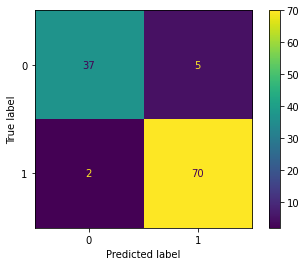

In [10]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show();  

# 10) Getting the components of the confusion matrix (for 1 as positive)

In [11]:
tn_1_pos, fp_1_pos, fn_1_pos, tp_1_pos = confusion_matrix(y_test, clf.predict(X_test), labels=[0,1]).ravel()

In [12]:
tn_1_pos, fp_1_pos, fn_1_pos, tp_1_pos

(37, 5, 2, 70)

# 11) Analysing 2nd row of classification report

In [13]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

                     precision    recall  f1-score   support

Class 0 (Malignant)       0.95      0.88      0.91        42
   Class 1 (Benign)       0.93      0.97      0.95        72

           accuracy                           0.94       114
          macro avg       0.94      0.93      0.93       114
       weighted avg       0.94      0.94      0.94       114



# 11.1) Precision (for 1 as positive)

In [14]:
precision_manual_1_pos = tp_1_pos/(tp_1_pos + fp_1_pos)
print("Precision (for 1 as positive):", precision_score(y_test, clf.predict(X_test)))
print("Precision from manual calculation (for 1 as positive):", precision_manual_1_pos)

Precision (for 1 as positive): 0.9333333333333333
Precision from manual calculation (for 1 as positive): 0.9333333333333333


# 11.2) Recall (for 1 as positive)

In [15]:
recall_manual_1_pos = tp_1_pos/(tp_1_pos + fn_1_pos)
print("Recall (for 1 as positive):", recall_score(y_test, clf.predict(X_test)))
print("Recall from manual calculation (for 1 as positive):", recall_manual_1_pos)

Recall (for 1 as positive): 0.9722222222222222
Recall from manual calculation (for 1 as positive): 0.9722222222222222


# 11.3) F1 Score (for 1 as positive)

In [16]:
f1_score_manual_1_pos = 2 * (precision_manual_1_pos * recall_manual_1_pos) / (precision_manual_1_pos + recall_manual_1_pos)
print("F1 Score (for 1 as positive):", f1_score(y_test, clf.predict(X_test)))
print("F1 Score from manual calculation (for 1 as positive):", f1_score_manual_1_pos)

F1 Score (for 1 as positive): 0.9523809523809524
F1 Score from manual calculation (for 1 as positive): 0.9523809523809524


# 11.4) Support (for 1 as positive)

In [17]:
support_manual_1_pos = tp_1_pos + fn_1_pos
print("Support (for 1 as positive):", sum(y_test))
print("Support from manual calculation (for 1 as positive):", support_manual_1_pos)

Support (for 1 as positive): 72
Support from manual calculation (for 1 as positive): 72


# 12) Analysing 1st row of classification report

In [18]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

                     precision    recall  f1-score   support

Class 0 (Malignant)       0.95      0.88      0.91        42
   Class 1 (Benign)       0.93      0.97      0.95        72

           accuracy                           0.94       114
          macro avg       0.94      0.93      0.93       114
       weighted avg       0.94      0.94      0.94       114



# 12.1) Plotting confusion matrix (for 0 as positive)

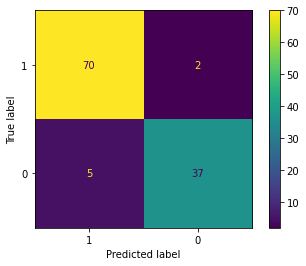

In [19]:
plot_confusion_matrix(clf, X_test, y_test, labels = [1,0])
plt.show();

# 12.2) Getting the components of the confusion matrix (for 0 as positive)

In [20]:
tn_0_pos, fp_0_pos, fn_0_pos, tp_0_pos = confusion_matrix(y_test, clf.predict(X_test), labels=[1,0]).ravel()

In [21]:
tn_0_pos, fp_0_pos, fn_0_pos, tp_0_pos

(70, 2, 5, 37)

# 12.3) Precision (for 0 as positive) 

In [22]:
precision_manual_0_pos = tp_0_pos/(tp_0_pos + fp_0_pos)
print("Precision (for 0 as positive):", precision_score(y_test, clf.predict(X_test), pos_label=0))
print("Precision from manual calculation (for 0 as positive):", precision_manual_0_pos)

Precision (for 0 as positive): 0.9487179487179487
Precision from manual calculation (for 0 as positive): 0.9487179487179487


# 12.4) Recall (for 0 as positive) 

In [23]:
recall_manual_0_pos = tp_0_pos/(tp_0_pos + fn_0_pos)
print("Recall (for 0 as positive):", recall_score(y_test, clf.predict(X_test), pos_label=0))
print("Recall from manual calculation (for 0 as positive):", recall_manual_0_pos)

Recall (for 0 as positive): 0.8809523809523809
Recall from manual calculation (for 0 as positive): 0.8809523809523809


# 12.5) F1 Score (for 0 as positive)

In [24]:
f1_score_manual_0_pos = 2 * (precision_manual_0_pos * recall_manual_0_pos) / (precision_manual_0_pos + recall_manual_0_pos)
print("F1 Score (for 0 as positive):", f1_score(y_test, clf.predict(X_test), pos_label=0))
print("F1 Score from manual calculation (for 0 as positive):", f1_score_manual_0_pos)

F1 Score (for 0 as positive): 0.9135802469135802
F1 Score from manual calculation (for 0 as positive): 0.9135802469135802


# 12.6) Support (for 0 as positive)

In [25]:
support_manual_0_pos = tp_0_pos + fn_0_pos
print("Support (for 0 as positive):", len(y_test) - sum(y_test))
print("Support from manual calculation (for 0 as positive):", support_manual_0_pos)

Support (for 0 as positive): 42
Support from manual calculation (for 0 as positive): 42


# 13) Analysing 3rd column of classification report

In [26]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

                     precision    recall  f1-score   support

Class 0 (Malignant)       0.95      0.88      0.91        42
   Class 1 (Benign)       0.93      0.97      0.95        72

           accuracy                           0.94       114
          macro avg       0.94      0.93      0.93       114
       weighted avg       0.94      0.94      0.94       114



# 13.1) F1 Score (for 0 as positive)

In [27]:
f1_score_manual_0_pos = 2 * (precision_manual_0_pos * recall_manual_0_pos) / (precision_manual_0_pos + recall_manual_0_pos)
print("F1 Score (for 0 as positive):", f1_score(y_test, clf.predict(X_test), pos_label=0))
print("F1 Score from manual calculation (for 0 as positive):", f1_score_manual_0_pos)

F1 Score (for 0 as positive): 0.9135802469135802
F1 Score from manual calculation (for 0 as positive): 0.9135802469135802


# 13.2) F1 Score (for 1 as positive)

In [28]:
f1_score_manual_1_pos = 2 * (precision_manual_1_pos * recall_manual_1_pos) / (precision_manual_1_pos + recall_manual_1_pos)
print("F1 Score (for 1 as positive):", f1_score(y_test, clf.predict(X_test)))
print("F1 Score from manual calculation (for 1 as positive):", f1_score_manual_1_pos)

F1 Score (for 1 as positive): 0.9523809523809524
F1 Score from manual calculation (for 1 as positive): 0.9523809523809524


# 13.3) Accuracy (using both 0 as positive and 1 as positive)

In [29]:
accuracy_manual_0_pos = (tn_0_pos + tp_0_pos)/(tn_0_pos + fp_0_pos + fn_0_pos + tp_0_pos)
accuracy_manual_1_pos = (tn_1_pos + tp_1_pos)/(tn_1_pos + fp_1_pos + fn_1_pos + tp_1_pos)

print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("Accuracy from manual calculation from manual calculation (for 0 as positive):", accuracy_manual_0_pos)
print("Accuracy from manual calculation from manual calculation (for 1 as positive):", accuracy_manual_1_pos)

Accuracy: 0.9385964912280702
Accuracy from manual calculation from manual calculation (for 0 as positive): 0.9385964912280702
Accuracy from manual calculation from manual calculation (for 1 as positive): 0.9385964912280702


# 13.4) F1 Score using macro average (unweighted average)

In [30]:
f1_score_manual_1_pos_macro_ave = (f1_score_manual_0_pos + f1_score_manual_1_pos)/ 2
print("F1 Score (Macro Average) (for 1 as positive):", f1_score(y_test, clf.predict(X_test), average = "macro"))
print("F1 Score (Macro Average) from manual calculation (for 1 as positive):", f1_score_manual_1_pos_macro_ave)

F1 Score (Macro Average) (for 1 as positive): 0.9329805996472663
F1 Score (Macro Average) from manual calculation (for 1 as positive): 0.9329805996472663


# 13.5) F1 Score using weighted average

In [31]:
support_manual_0_pos

42

In [32]:
support_manual_1_pos

72

In [33]:
f1_score_manual_1_pos_weighted_ave = (support_manual_0_pos * f1_score_manual_0_pos + support_manual_1_pos * f1_score_manual_1_pos)/ (support_manual_0_pos + support_manual_1_pos)
print("F1 Score (for 1 as positive):", f1_score(y_test, clf.predict(X_test), average = "weighted"))
print("F1 Score (Weighted Average) from manual calculation (for 1 as positive):", f1_score_manual_1_pos_weighted_ave)

F1 Score (for 1 as positive): 0.9380859556298152
F1 Score (Weighted Average) from manual calculation (for 1 as positive): 0.9380859556298152
